<a href="https://colab.research.google.com/github/AleBoattini/AleBoattini/blob/main/Salud_Mental_en_Estudiantes_Universitarios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Story Stelling

## 1. Introduccion

A través de la toma de datos sobre salud mental en estudiantes universitarios se busca evaluar características, hábitos o condiciones que afecten en los niveles de estrés y ansiedad de las personas estudiantes. 
La muestra de datos es obtenida a través de una única encuesta distribuida en la población universitaria de la provincia de Misiones, Argentina. Consiguiendo la mayor distribución en la Universidad Nacional de Misiones (UNAM) de la Ciudad de Oberá, Eldorado, y en menor medidas Posadas. Esto influye a que los resultados tengan una concentración predominante en carreras referentes a Ingenierías, Bellas Artes, Forestales.


Para evaluar su una persona presenta estrés o ansiedad se usarán 2 preguntas claves, nivel de estrés que considera tener y síntomas que percibió en las últimas 2 semanas.

La encuesta realizada para la toma de datos es rellenada única y exclusivamente por el encuestado, no está involucrado ningún profesional de la salud, por lo que los datos no pueden dar respuesta a ninguna condición clínica de estrés o ansiedad. Si da respuesta a como se percibe la persona al momento de responder.


### 1.1 Encuesta presentada
La encuesta está elaborada para poder identificar características descriptivas que logren influir en el estado anímico de la persona desde el estrés o ansiedad. Como son sus 2 últimas preguntas donde se busca entender cómo se siente la persona identificando síntomas y la intensidad en la que creen padecer.

| Pregunta | Motivo |
| --- | --- |
| ¿Cuál es tu edad? | Para conocer las características generales del encuestado |
| ¿Cuál es tu Genero? | Para conocer las características generales del encuestado |
| ¿Cuál es tu estado civil? | Para conocer las características generales del encuestado |
| ¿Cuál es tu carrera universitaria? | De interés por ser población universitaria |
| ¿En qué año académico estás? | Para conocer si el año académico influye en el estado anímico |
| ¿Cuántas horas duermes por noche? | Las horas de sueño tienen relación directa con el estado anímico en las personas |
| ¿Participas en actividades extracurriculares? | Para identificar si las actividades extras influyen en el estado anímico |
| ¿Con qué frecuencia haces ejercicio físico? | Porque la actividad física tiene beneficios a nivel químico ante el estrés |
| ¿Crees que tienes una dieta saludable y equilibrada? | Para conocer las características del encuestado |
| ¿Consume alcohol? | El consumo de alcohol está relacionado al estrés y ansiedad |
| ¿Fumas cigarrillos? | El consumo de cigarrillos está relacionado al estrés y ansiedad |
| ¿Consumes o has consumido alguna otra droga? | El consumo de drogas está relacionado al estrés y ansiedad |
| ¿Has experimentado acoso o discriminación en la universidad? (Marca las que consideres) | Para conocer las características de situaciones que vivió el encuestado |
| ¿Alguna vez ha sido diagnosticado con un trastorno de salud mental? | Porque influiría en síntomas certeros |
| ¿Tiene acceso a servicios de salud mental en su universidad o comunidad? | Para relevar información |
| ¿Cómo calificarías tu nivel de estrés y ansiedad en general? | Para conocer cómo se siente anímicamente el encuestado |
| ¿Ha experimentado alguno de los siguientes síntomas en las últimas dos semanas? | Los síntomas son los que definen si una persona padece en mayor o menor medida de entres o ansiedad |
| ¿Cómo haces frente al estrés y la ansiedad? | Para conocer las características generales del encuestado |



## 2. Resultados
Se dara un pequeño vistaso a las caracteristicas de la muestra de datos, a algunas de sus relaciones entre variables de importancia como tambien un leves conclusiones de estos resultados

# Trabajo de datos

## Carga de datos

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_excel('/content/Encuesta Salud Mental.xlsx')
df.drop('Marca temporal', axis=1, inplace=True)

In [ ]:
preguntas=list(df.columns)
columnas=['EDAD','GENERO','RELACION_CIVIL','CARRERA_UNIVERSITARIA','AÑO_ACADEMICO',
          'HORAS_SUEÑO','ACTIVIDADES_EXTRACURRICULARES','EJERCICIO_FISICO','DIETA SALUDABLE',
          'ALCOHOL','CIGARRILLOS','DROGAS','ACOSO_DESCRIMINACION','DIAGNOSTICO_TRASTORNO_MENTAL',
          'SERVICIOS_SALUD_MENTAL','NIVEL_ESTRES/ANSIEDAD','SINTOMAS_PERCIBIDOS','ACTIVIDAD_SOLVENCIA']
tabla=pd.DataFrame({'Encuesta':preguntas, 'Variable':columnas})

In [ ]:
df.columns=columnas

## Conciliacion del nivel de estres
Este paso conciste en interpretar los sintomas suministrados con la intensidad para conciliar un nivel de estres entre bajo, medio y alto. El primer estimador es el numero de sintomas con el que se sienten identificados.

| NIVEL DE ESTRÉS/ANSIEDAD comunicado | NUMERO DE SÍNTOMAS | SÍNTOMAS CLAVES | NIVEL DE ESTRES/ANSIEDAD ESTIMADO |
| ---------------------------------- | ----------------------------- | -------------------- | -------------------------------- |
| Bajo                               | Menos de 3                     | Preocupación/Miedo excesivo, Cambios en el apetito, Fatiga o Falta de energía | Entre 0 y 1 |
| Moderado                           | Entre 3 y 5                   |  Dificultad para concentrarse, Irritabilidad, Perdida de interés en Actividades que antes disfrutaba | Entre 2 y 3 |
| Alto                               | Entre 5 y 7                   |   Sentimiento de Tristeza o desesperanza, Dificultad para conciliar el sueño, Culpa o Sensación de inutilidad | Entre 3 y 4 |




Se crea una columna que indica la cantidad de sintomas presentados.

In [6]:
# Contar la cantidad de valores separados por comas en cada fila
df['SINTOMAS_PERCIBIDOS'] = df['SINTOMAS_PERCIBIDOS'].apply(lambda x: x.replace('Sentimientos de tristeza, desesperanza o desesperación', 'Sentimientos de tristeza/desesperanza o desesperación'))
cantidad_valores = df['SINTOMAS_PERCIBIDOS'].str.count(', ') + 1
df['CANTIDAD_SINTOMAS']=cantidad_valores

Se crean 3 columnas que indican el numero de sintomas claves que presenta

In [7]:
lista1=['Preocupación o miedo excesivo','Fatiga o falta de energía','Cambios en el apetito o en el peso']
lista2=['Irritabilidad','Pérdida de interés en actividades que antes disfrutaba','Dificultad para concentrarse']
lista3=['Sentimientos de tristeza/desesperanza o desesperación','Dificultad para conciliar el sueño o permanecer dormido','Sensación de inutilidad o culpa excesiva']

df['Nivel 1'] = df['SINTOMAS_PERCIBIDOS'].apply(lambda x: sum(sintoma in lista1 for sintoma in x.split(', ')))
df['Nivel 2'] = df['SINTOMAS_PERCIBIDOS'].apply(lambda x: sum(sintoma in lista2 for sintoma in x.split(', ')))
df['Nivel 3'] = df['SINTOMAS_PERCIBIDOS'].apply(lambda x: sum(sintoma in lista3 for sintoma in x.split(', ')))

Se crea la columna clave evaluando el nivel de estres y ponderando por la percepcion del encuestado

In [8]:
# Creamos una nueva columna llamada 'NIVEL' y la inicializamos con valores nulos
df['NIVEL'] = None

# Iteramos a traves de las filas del DataFrame y asignamos los valores a la nueva columna
for i, row in df.iterrows():
    n_sintomas = row['CANTIDAD_SINTOMAS']
    if n_sintomas <= 3:
        df.at[i, 'NIVEL DE ESTRES'] = 'Bajo'
    elif n_sintomas < 6:
        df.at[i, 'NIVEL DE ESTRES'] = 'Medio'
    else:
        df.at[i, 'NIVEL DE ESTRES'] = 'Alto'

In [9]:
df.drop(columns=['Nivel 1', 'Nivel 2', 'Nivel 3','NIVEL'], inplace=True)

## EDA (Analisis exploratorio de datos)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557 entries, 0 to 556
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EDAD                           557 non-null    int64 
 1   GENERO                         557 non-null    object
 2   RELACION_CIVIL                 557 non-null    object
 3   CARRERA_UNIVERSITARIA          557 non-null    object
 4   AÑO_ACADEMICO                  557 non-null    object
 5   HORAS_SUEÑO                    557 non-null    object
 6   ACTIVIDADES_EXTRACURRICULARES  283 non-null    object
 7   EJERCICIO_FISICO               557 non-null    object
 8   DIETA SALUDABLE                557 non-null    object
 9   ALCOHOL                        557 non-null    object
 10  CIGARRILLOS                    557 non-null    object
 11  DROGAS                         557 non-null    object
 12  ACOSO_DESCRIMINACION           168 non-null    object
 13  DIAGN

### Normalizacion de datos y relleno de nulos
Para poder dar inicio a la exploracion de los datos sin mayores inconvenients de formato se normalizaran algunos datos categoricos y se rellenaran los nulos necesarios. Se conoce la encuesta y sus datos, motivo de que se procede directamente.




In [11]:
mask=df.isnull()
nulos=mask.sum()
nulos[nulos>0]

ACTIVIDADES_EXTRACURRICULARES    274
ACOSO_DESCRIMINACION             389
ACTIVIDAD_SOLVENCIA               13
dtype: int64

#### Relleno de Actividades Extracurriculares

*   Elemento de lista
*   Elemento de lista



In [12]:
df['ACTIVIDADES_EXTRACURRICULARES'].value_counts()

Deportes                              196
Talleres                               27
Musica                                 15
Danzas                                 12
Musica, Deportes                       10
Deportes, Talleres                      7
Danzas, Deportes                        7
Musica, Talleres                        3
No                                      1
Teatro                                  1
Teatro, Deportes                        1
Danzas, Deportes, Talleres              1
Musica, Danzas                          1
Musica, Danzas, Deportes, Talleres      1
Name: ACTIVIDADES_EXTRACURRICULARES, dtype: int64

In [13]:
df['ACTIVIDADES_EXTRACURRICULARES'].fillna('No realiza', inplace=True)
df['ACTIVIDADES_EXTRACURRICULARES'].replace('No', 'No realiza', inplace=True)

#### Relleno sobre la columna de Acoso

In [14]:
df['ACOSO_DESCRIMINACION'].value_counts()

Por docentes                 76
Por alumnos                  59
Por docentes, Por alumnos    32
No                            1
Name: ACOSO_DESCRIMINACION, dtype: int64

In [15]:
df['ACOSO_DESCRIMINACION'].replace('No', np.nan, inplace=True)
df['ACOSO_DESCRIMINACION'].fillna('No', inplace=True)

#### Relleno sobre la columna de Actividades ante el Estres

In [16]:
df['ACTIVIDAD_SOLVENCIA'].value_counts()

Otra                                                       123
Estar con amigos o familia                                  95
Ejercicio                                                   69
Ejercicio, Estar con amigos o familia                       66
Estar con amigos o familia, Otra                            37
Meditacion                                                  24
Ejercicio, Otra                                             23
Ejercicio, Meditacion                                       22
Ejercicio, Estar con amigos o familia, Otra                 21
Meditacion, Estar con amigos o familia                      20
Ejercicio, Meditacion, Estar con amigos o familia           18
Ejercicio, Meditacion, Estar con amigos o familia, Otra      9
Meditacion, Otra                                             7
Ejercicio, Meditacion, Otra                                  5
Meditacion, Estar con amigos o familia, Otra                 5
Name: ACTIVIDAD_SOLVENCIA, dtype: int64

In [17]:
df['ACTIVIDAD_SOLVENCIA'].fillna('No', inplace=True)

### Exploracion

Se enfocara la exploracion en las variables que representen a la poblacion como es la edad, carrera universitaria, año acedemico, genero.

#### Edades
Se espera que las edades esten entre los 18 y 30 años, con un pico en su rango medio. Dado que a las universidades en esta zona acceden en mayor medida las personas jovenes, influenciado porque las carreras son fulltime y rara vez permiten combinar sus cursadas con jornadas de trabajo normales.

Se pueden observar outliers o datos atipicos en la muestra que deberan ser limpiados o trabajados con cuidado.

Diagrama de Caja y Bigote para identificar la media, los rango y sus valores atipicos...

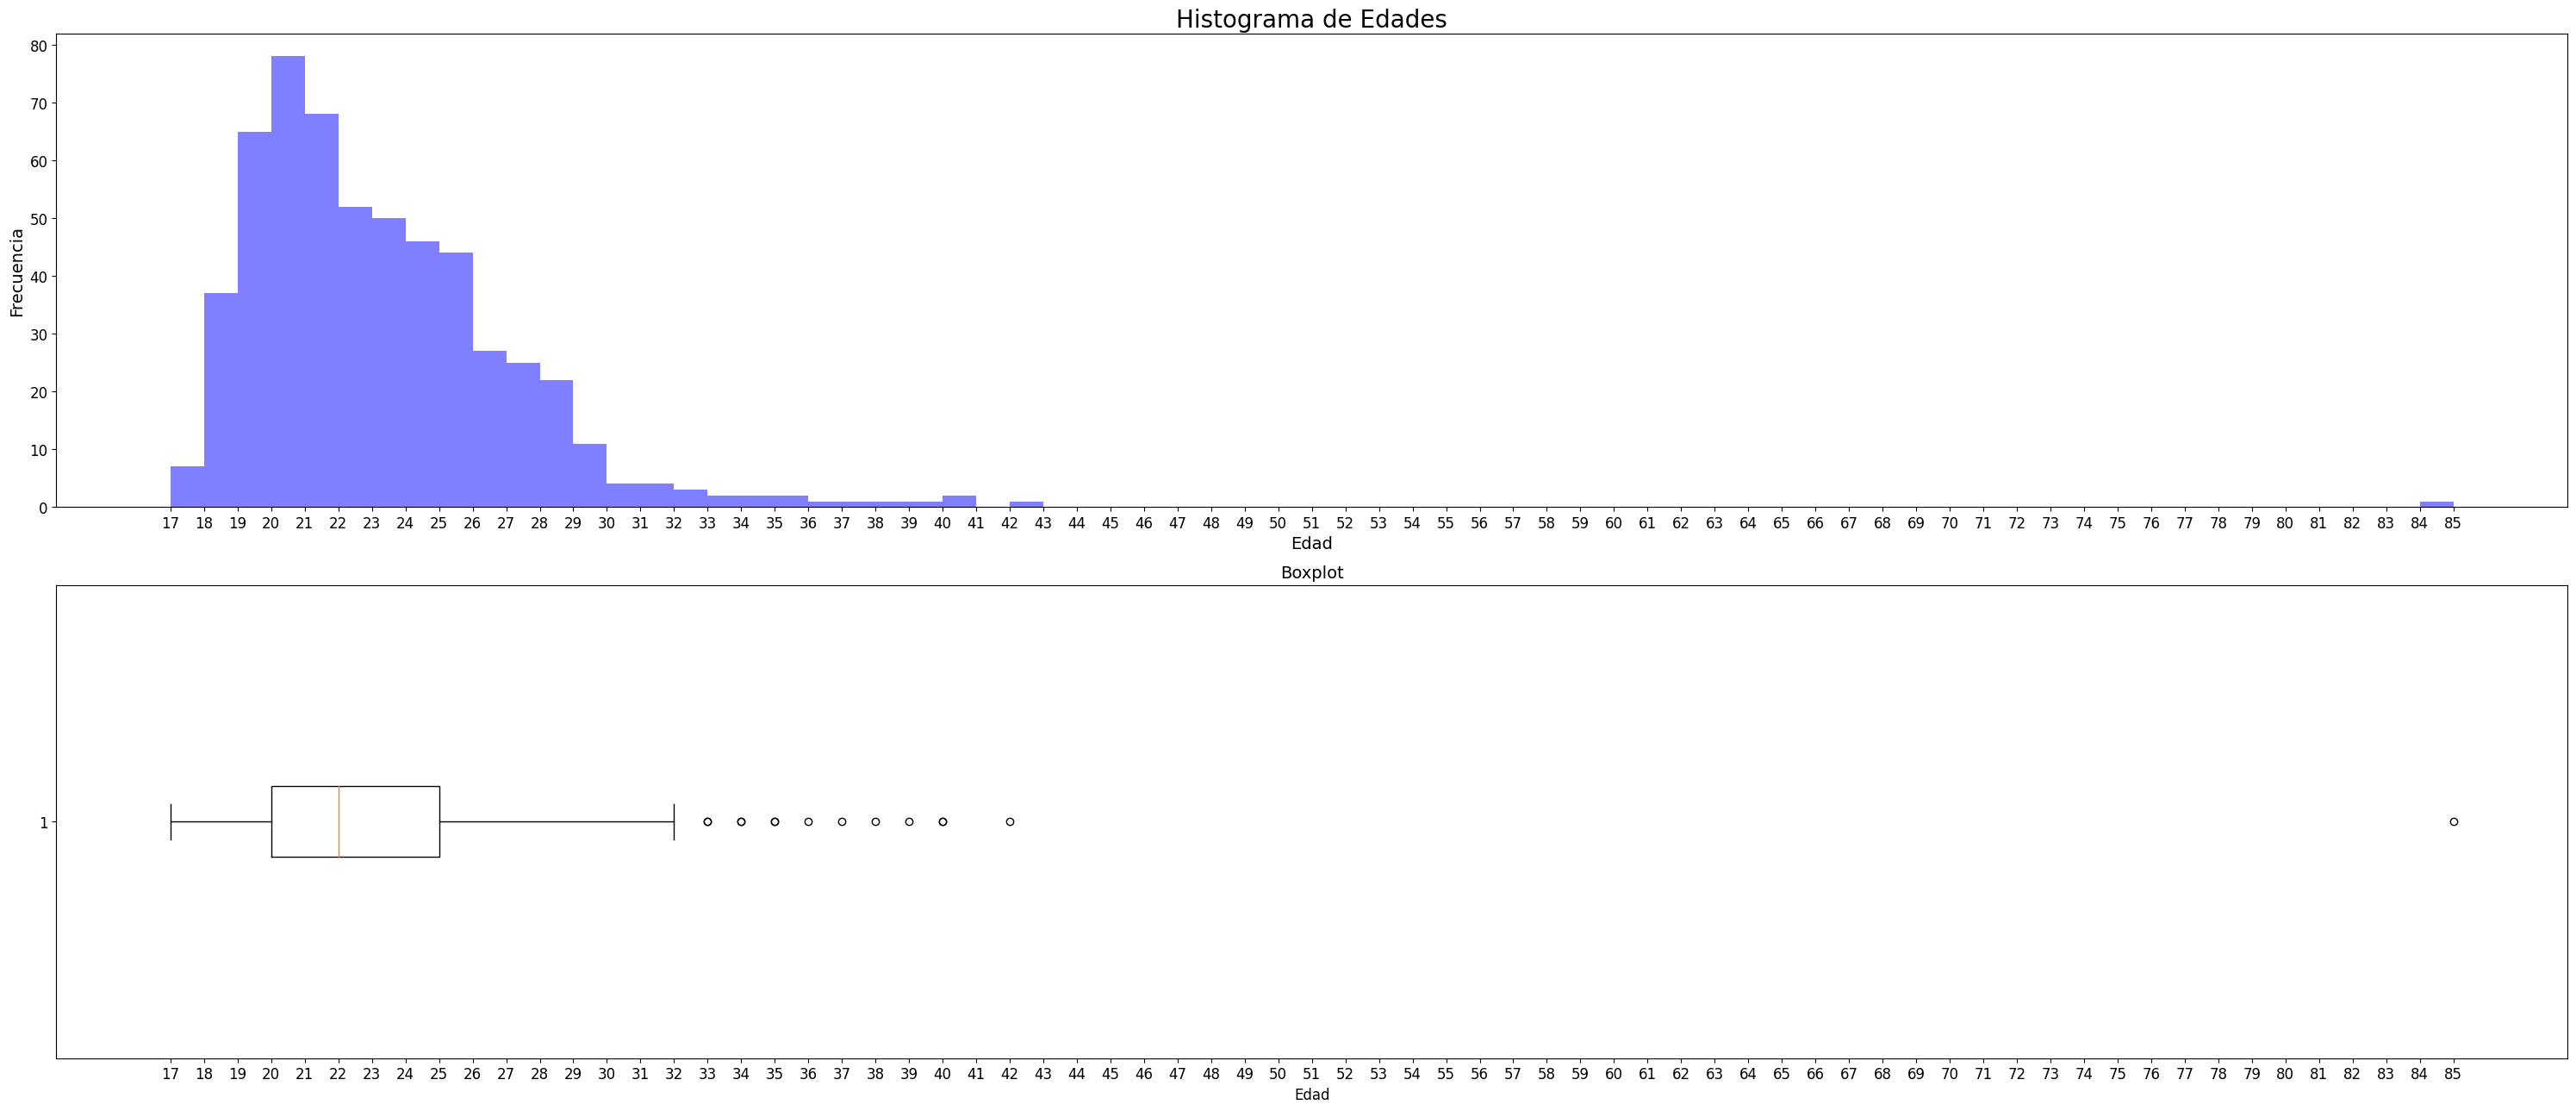

In [18]:
etiquetas = np.arange(df['EDAD'].min(), df['EDAD'].max()+1)

# Crear figura y subplots
fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(30, 13))

# Histograma de Edades
axs[0].hist(df['EDAD'], bins=etiquetas, color='blue', alpha=0.5)
axs[0].set_xticks(etiquetas)
axs[0].tick_params(axis='both', labelsize=12)
axs[0].set_xlabel('Edad', fontsize=14)
axs[0].set_ylabel('Frecuencia', fontsize=14)
axs[0].set_title('Histograma de Edades', fontsize=20)

# Boxplot
axs[1].boxplot(df['EDAD'].values, vert=False, showfliers=True)
axs[1].set_xticks(etiquetas)
axs[1].tick_params(axis='both', labelsize=12)
axs[1].set_xlabel('Edad', fontsize=12)
axs[1].set_title('Boxplot', fontsize=14)

plt.tight_layout()
plt.show()


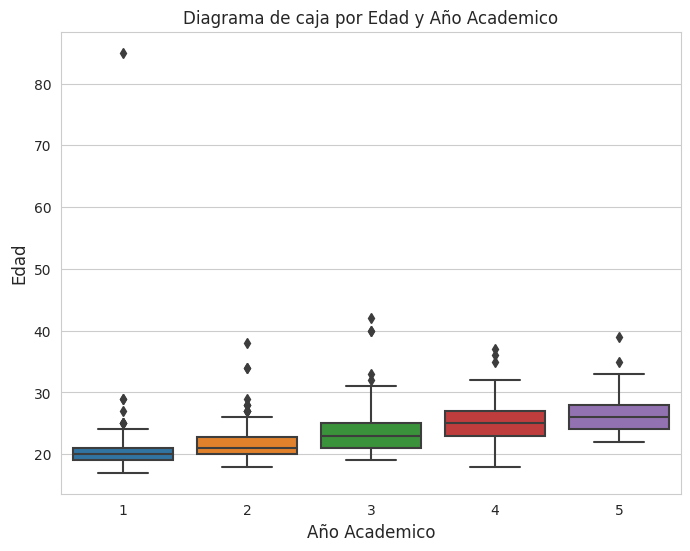

In [19]:
#Normalizo las etiquetas de los años academicos para poder visualizar mejor
equivalencias = {"Primer año": 1, "Segundo año": 2, "Tercer año": 3, 'Cuarto año': 4, 'Quinto año': 5}
df["AÑO_ACADEMICO"] = df["AÑO_ACADEMICO"].replace(equivalencias)

#Grafico
plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("bright")

sns.boxplot(x='AÑO_ACADEMICO', y='EDAD', data=df)

plt.title("Diagrama de caja por Edad y Año Academico")
plt.xlabel('Año Academico', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.show()

In [20]:
df.drop(0,inplace=True)

Se limpian los outliers hasta el 3er año academico por conciderar como datos no confiables, para el 4to y 5to año son edades que pueden existir con mayor probabilidad a finales de una carrera universitaria.

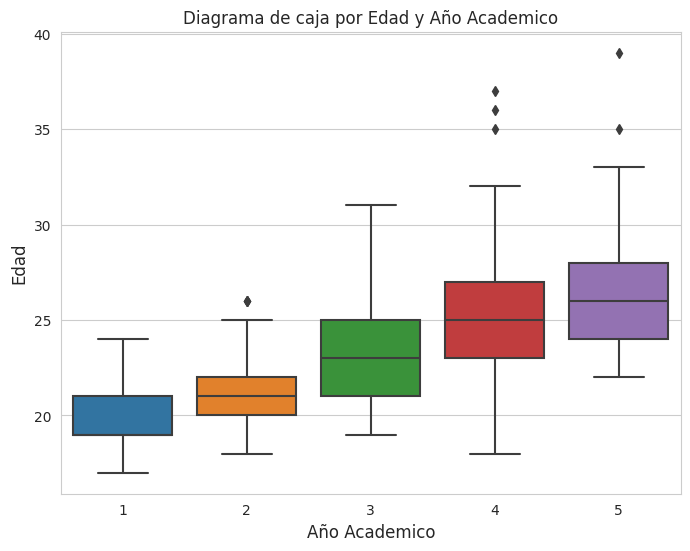

In [21]:
# Calcular límites inferior y superior por grupo de 'AÑO ACADEMICO'
limites_inferiores = df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.25) - 1.5 * (df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.75) - df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.25))
limites_superiores = df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.75) + 1.5 * (df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.75) - df.groupby('AÑO_ACADEMICO')['EDAD'].quantile(0.25))

# Recorrer el DataFrame y eliminar valores por encima del límite superior
for i, row in df.iterrows():
    if row['AÑO_ACADEMICO'] <= 3 and row['EDAD'] > limites_superiores[row['AÑO_ACADEMICO']]:
        df = df.drop(i)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("bright")

sns.boxplot(x='AÑO_ACADEMICO', y='EDAD', data=df)

plt.title("Diagrama de caja por Edad y Año Academico")
plt.xlabel('Año Academico', fontsize=12)
plt.ylabel('Edad', fontsize=12)
plt.show()

#### Genero y Carrera universitaria

En el total la muestra los generos masculino y femenino estan balanceados y es de esperarse que los demas generos se deen en menor proporcion. Tanto si seccionamos por carrera podemos notar como si los generos y el numero de muestras varia. 

Para trabajar se agrupa en Ingenierias, licenciaturas, Profesorados/Tecnicaturas. Con el fin de que el modelo no pase por alto las muestras menos enriquecidas. 

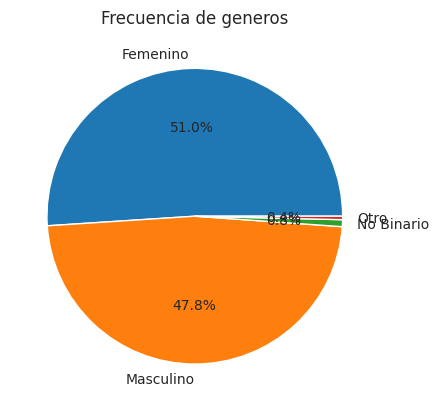

In [22]:
conteo = df['GENERO'].value_counts()

# crear el gráfico pie
plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%')

# titulo del gráfico
plt.title('Frecuencia de generos')

# mostrar el gráfico
plt.show()

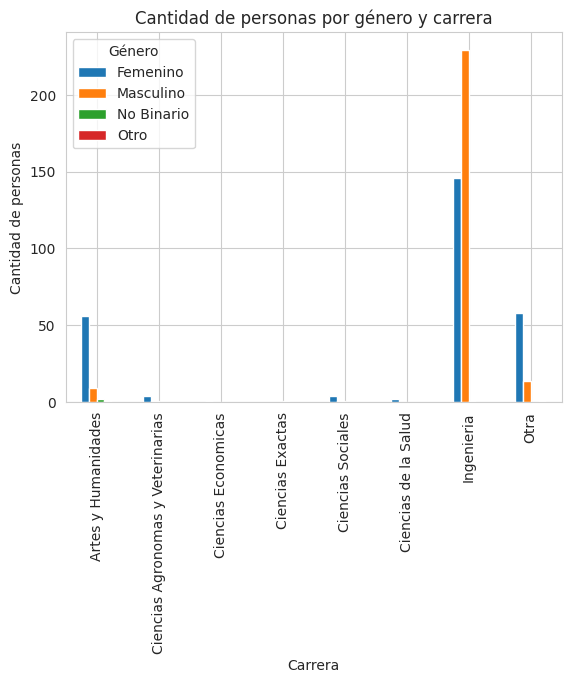

In [23]:
# Agrupar y contar el número de personas por género en cada carrera
conteo = df.groupby(['CARRERA_UNIVERSITARIA', 'GENERO']).size().reset_index(name='Cantidad')

# Pivotear la tabla para tener género como columnas
pivot = conteo.pivot(index='CARRERA_UNIVERSITARIA', columns='GENERO', values='Cantidad')

# Crear un gráfico de barras agrupado
ax = pivot.plot(kind='bar', stacked=False)

# Agregar etiquetas
ax.set_xlabel('Carrera')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Cantidad de personas por género y carrera')
plt.legend(title='Género')
plt.show()


Agrupamos en ingenierias, licenciaturas y tecnicaturas/profesorados

In [24]:
licensiaturas=['Artes y Humanidades', 'Ciencias Agronomas y Veterinarias', 'Ciencias Economicas', 'Ciencias Exactas', 'Ciencias Sociales', 'Ciencias de la Salud']
tecnicaturas=['Otra']

In [25]:
for x in licensiaturas:
  df['CARRERA_UNIVERSITARIA'].replace(x, 'Licenciaturas', inplace=True)
df['CARRERA_UNIVERSITARIA'].replace('Otra', 'Profesorados/Tecnicaturas', inplace=True)

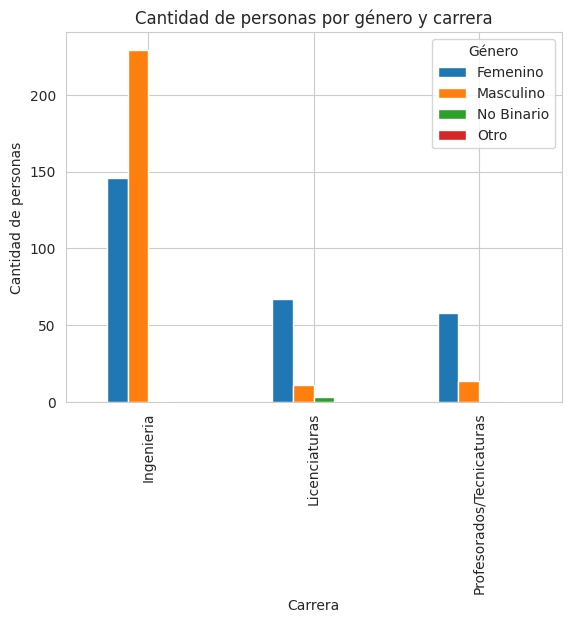

In [26]:
# Agrupar y contar el número de personas por género en cada carrera
conteo = df.groupby(['CARRERA_UNIVERSITARIA', 'GENERO']).size().reset_index(name='Cantidad')

# Pivotear la tabla para tener género como columnas
pivot = conteo.pivot(index='CARRERA_UNIVERSITARIA', columns='GENERO', values='Cantidad')

# Crear un gráfico de barras agrupado
ax = pivot.plot(kind='bar', stacked=False)

# Agregar etiquetas
ax.set_xlabel('Carrera')
ax.set_ylabel('Cantidad de personas')
ax.set_title('Cantidad de personas por género y carrera')
plt.legend(title='Género')
plt.show()

#### Año acedemico
Se encuentra mayor distribucion de personas en primer y segundo año, es de esperarce por ser donde existe la mayor taza de ingresos a la facultad.
Tambien se detectan outliers en respecto a la edad del encuestado en cada año, a tener en cuenta para una correcta limpieza de los datos

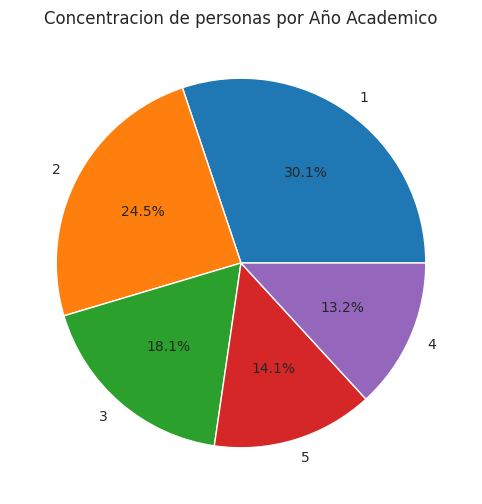

In [27]:
conteo = df['AÑO_ACADEMICO'].value_counts(ascending=False)

plt.figure(figsize=(8, 6))
sns.set_style("whitegrid")
sns.color_palette("bright")
plt.pie(conteo.values, labels=conteo.index, autopct='%1.1f%%')
plt.title("Concentracion de personas por Año Academico")
plt.show()


#### Sintomas y Estres

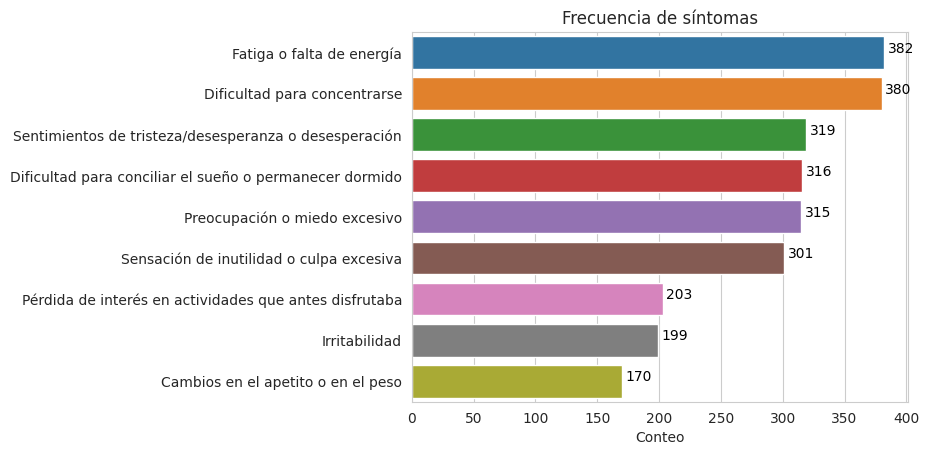

In [29]:
conteo = df['SINTOMAS_PERCIBIDOS'].str.split(', ', expand=True).stack().value_counts(ascending=False)

# Crear el gráfico de barras horizontal utilizando sns.barplot()
ax = sns.barplot(x=conteo.values, y=conteo.index)

# Agregar etiquetas de valores a las barras
for i, v in enumerate(conteo.values):
    ax.text(v + 3, i, str(v), color='black', ha='left')

# Agregar títulos y etiquetas de ejes
plt.title('Frecuencia de síntomas')
plt.xlabel('Conteo')
plt.ylabel('')

# Mostrar el gráfico
plt.show()

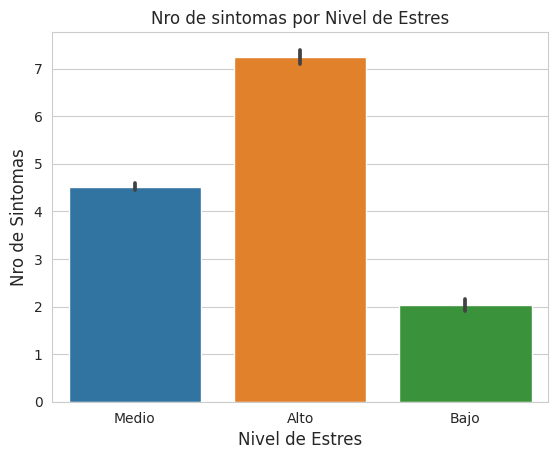

In [30]:
sns.barplot(x='NIVEL DE ESTRES', y='CANTIDAD_SINTOMAS', data=df)

plt.title("Nro de sintomas por Nivel de Estres")
plt.xlabel('Nivel de Estres', fontsize=12)
plt.ylabel('Nro de Sintomas', fontsize=12)
plt.show()

In [31]:
df['HORAS_SUEÑO'].value_counts()

Entre 6 y 7 horas    273
Menos de 6 horas     177
Entre 7 y 8 horas     71
Más de 8 horas        10
Name: HORAS_SUEÑO, dtype: int64

In [32]:
dicc={'1 vez a la semana':'1 día','2 o 3 veces a la semana':'2 a 3 días','Más de 3 veces a la semana':'+3 días'}
dicc2={'Entre 6 y 7 horas':'Entre 6 y 7','Menos de 6 horas':'<6','Entre 7 y 8 horas':'Entre 7 y 8', 'Más de 8 horas':'+8'}
dicc3={'Ocacionalmente (fines de semana o encuentros con amigos)':'Ocacionalmente'}

df['EJERCICIO_FISICO']=df['EJERCICIO_FISICO'].replace(dicc)
df['HORAS_SUEÑO']=df['HORAS_SUEÑO'].replace(dicc2)
df['ALCOHOL']=df['ALCOHOL'].replace(dicc3)

In [33]:
df['ALCOHOL'].value_counts()

Ocacionalmente    393
Nunca             119
Regularmente       19
Name: ALCOHOL, dtype: int64

In [45]:
moda1 = df.groupby('CIGARRILLOS')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index()

moda2 = df.groupby('DROGAS')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index()

moda3 = df.groupby('HORAS_SUEÑO')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index().sort_values('CANTIDAD_SINTOMAS', ascending=True)

moda4 = df.groupby('EJERCICIO_FISICO')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index().sort_values('CANTIDAD_SINTOMAS', ascending=True)

moda5 = df.groupby('ALCOHOL')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index()

moda6 = df.groupby('AÑO_ACADEMICO')['CANTIDAD_SINTOMAS'].agg(pd.Series.mode).reset_index()


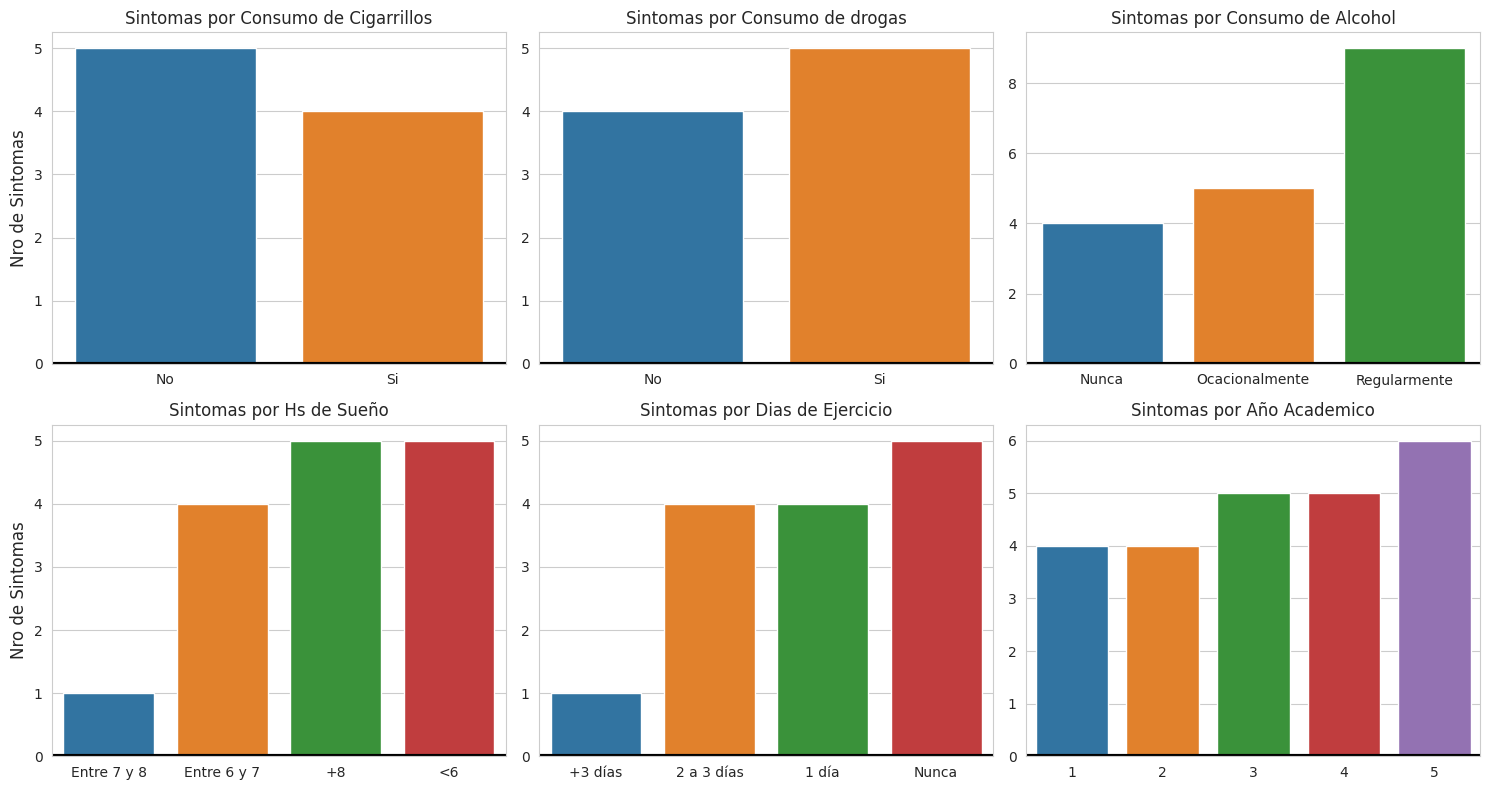

In [49]:
# Crear una figura con dos subplots
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))

# Boxplot 1
sns.barplot(x='CIGARRILLOS', y='CANTIDAD_SINTOMAS', data=moda1, ax=axs[0,0])
axs[0,0].set_title("Sintomas por Consumo de Cigarrillos")
axs[0,0].set_xlabel('')
axs[0,0].set_ylabel('Nro de Sintomas', fontsize=12)
axs[0,0].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

# Boxplot 2
sns.barplot(x='DROGAS', y='CANTIDAD_SINTOMAS', data=moda2, ax=axs[0,1], order=sorted(df['DROGAS'].unique()))
axs[0,1].set_title("Sintomas por Consumo de drogas")
axs[0,1].set_xlabel('', fontsize=12)
axs[0,1].set_ylabel('', fontsize=12)
axs[0,1].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

# Boxplot 3
sns.barplot(x='ALCOHOL', y='CANTIDAD_SINTOMAS', data=moda5, ax=axs[0,2], order=sorted(df['ALCOHOL'].unique()))
axs[0,2].set_title("Sintomas por Consumo de Alcohol")
axs[0,2].set_xlabel('', fontsize=12)
axs[0,2].set_ylabel('', fontsize=12)
axs[0,2].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

# Boxplot 4
sns.barplot(x='HORAS_SUEÑO', y='CANTIDAD_SINTOMAS', data=moda3, ax=axs[1,0], order=df.groupby('HORAS_SUEÑO')['CANTIDAD_SINTOMAS'].mean().sort_values().index)
axs[1,0].set_title("Sintomas por Hs de Sueño")
axs[1,0].set_xlabel('', fontsize=12)
axs[1,0].set_ylabel('Nro de Sintomas', fontsize=12)
axs[1,0].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

# Boxplot 5
sns.barplot(x='EJERCICIO_FISICO', y='CANTIDAD_SINTOMAS', data=moda4, ax=axs[1,1], order=df.groupby('EJERCICIO_FISICO')['CANTIDAD_SINTOMAS'].mean().sort_values().index)
axs[1,1].set_title("Sintomas por Dias de Ejercicio")
axs[1,1].set_xlabel('', fontsize=12)
axs[1,1].set_ylabel('', fontsize=12)
axs[1,1].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

# Boxplot 6
sns.barplot(x='AÑO_ACADEMICO', y='CANTIDAD_SINTOMAS', data=moda6, ax=axs[1,2])
axs[1,2].set_title("Sintomas por Año Academico")
axs[1,2].set_xlabel('', fontsize=12)
axs[1,2].set_ylabel('', fontsize=12)
axs[1,2].axhline(y=0, color='black', linewidth=3)  # Agregar línea negra

plt.tight_layout() # ajusta el espacio entre los subplots
plt.show()

## Normalizacion del dataframe

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 531 entries, 1 to 556
Data columns (total 20 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EDAD                           531 non-null    int64 
 1   GENERO                         531 non-null    object
 2   RELACION_CIVIL                 531 non-null    object
 3   CARRERA_UNIVERSITARIA          531 non-null    object
 4   AÑO_ACADEMICO                  531 non-null    int64 
 5   HORAS_SUEÑO                    531 non-null    object
 6   ACTIVIDADES_EXTRACURRICULARES  531 non-null    object
 7   EJERCICIO_FISICO               531 non-null    object
 8   DIETA SALUDABLE                531 non-null    object
 9   ALCOHOL                        531 non-null    object
 10  CIGARRILLOS                    531 non-null    object
 11  DROGAS                         531 non-null    object
 12  ACOSO_DESCRIMINACION           531 non-null    object
 13  DIAGN

In [42]:
d_genero={'Masculino':0, 'Femenino':1, 'No Binario':2, 'Otro':3}
d_estadocivil={'Soltero':0, 'Tengo pareja':1, 'Union libre':2, 'Viudo':3, 'Casado':4}

Alto     210
Medio    166
Bajo     155
Name: NIVEL DE ESTRES, dtype: int64


Text(0.5, 1.0, 'Frecuencia de Niveles de Estres')

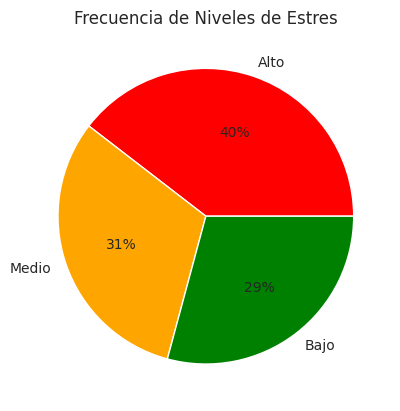

In [43]:
d=df['NIVEL DE ESTRES'].value_counts()
print(d)
plt.pie(d, labels=d.index,colors=['red', 'orange', 'green'], autopct = '%0.0f%%')
plt.title('Frecuencia de Niveles de Estres')